# Machine Learning project

### Gruppo 7:
- **Emanuele Conforti (252122)**
- **Jacopo Garofalo (252093)**
- **Gianmarco La Marca (252256)**

## **Heart disease Dataset**

### **Business Understanding**

- **Scenario**
    - CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).
The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends and stratified by sex and race/ethnicity.
- **Goal**
    - Define an automatic procedure for categorizing cardiovascular diseases 

### **Data Understanding**

| Column Name                   	 | Description                                                                                                     	| Type                      	         |
|------------------------------|------------------------------------------------	|-------------------------------------|
| Year               	         | Year                    	| Numeric                      	      |
| LocationAbbr               	 | Location abbreviation                 	| Categorical             	           |    
| LocationDesc                	 | Location description      	| Categorical                      	  |
| DataSource        	          |        Abbreviation of data source       	| Categorical                       	 |
| PriorityArea1         	      |   Priority Area (Million Hearts® or None)          	| Categorical    	                    |
| PriorityArea2           	    |    Priority Area (ABCS or None)       | Categorical                         | 
| PriorityArea3          	     |   Priority Area (Healthy People 2020 or None)        	| Categorical                       	 |
| PriorityArea4          	     |      Priority Area (AHA 2020 Goals: Cardiovascular Health Metrics or None)            	| Categorical                    	    |
| Category               	     | Category description                    	| Categorical                      	  |
| Topic               	        | Topic description                 	| Categorical             	           |    
| Indicator                	   | Indicator description      	| Categorical                      	  |
| Data_Value_Type        	          |        Data Value Type (mean, rate, percentage)       	| Categorical                       	 |
| Data_Value_Unit         	      |   Data Value Unit (%, rate per 100,000, etc.)          	| Categorical    	                    |
| Data_Value           	               |    Data value (point estimate)       | Numeric                             | 
| Data_Value_Alt          	                 |   Equal to data value, but formatting is numeric        	| Numeric                       	     |
| Data_Value_Footnote_Symbol          	              |      Symbol that would be used to flag footnotes            	| Categorical                    	    |
| Data_Value_Footnote               	         | Footnote description                    	| Numeric                      	      |
| LowConfidenceLimit               	 | 95% confidence interval lower bound                 	| Numeric             	               |    
| HighConfidenceLimit                	 | 95% confidence interval upper bound      	| Numeric                      	      |
| Break_Out_Category        	          |        Break out category description       	| Categorical                       	 |
| Break_Out         	      |   Break out group description          	| Categorical    	                    |
| CategoryId           	               |    Category lookup value       | Categorical                         | 
| TopicId          	                 |   Topic lookup value        	| Categorical                       	 |
| IndicatorID          	              |      Indicator lookup value            	| Categorical                    	    |
| Data_Value_TypeID                	 | Data value type lookup value      	| Categorical                      	  |
| BreakOutCategoryId        	          |        Break out category lookup value       	| Categorical                       	 |
| BreakOutId         	      |   Break out group lookup value          	| Categorical    	                    |
| LocationID        	          |        Location lookup value       	| Numeric                       	     |
| GeoLocation         	      |   Latitude & Longitude to be provided for formatting GeoLocation or Geocode in the format (latitude, longitude)          	| Categorical    	                    |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

df = pd.read_csv('heart_disease_data.csv')
df

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,2012,CO,Colorado,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"


#### **Number of rows and cols**

In [2]:
df.shape

(42640, 29)

#### **Number of elements in the matrix**

In [3]:
df.size

1236560

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               9360 non-null   object 
 5   PriorityArea2               0 non-null      float64
 6   PriorityArea3               14560 non-null  object 
 7   PriorityArea4               0 non-null      float64
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42640.0,2008.500000,2.872315,2004.0,2006.00,2008.5,2011.0,2013.0
PriorityArea2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PriorityArea4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,42111.0,14.780896,13.286487,0.4,4.50,10.7,21.6,333.3
Data_Value_Alt,42640.0,14.572709,13.333826,-2.0,4.40,10.4,21.5,333.3
LowConfidenceLimit,42111.0,12.661509,11.453615,0.0,3.80,8.2,19.6,94.2
HighConfidenceLimit,42111.0,17.074028,17.910274,1.1,5.00,12.7,23.4,710.5
LocationID,42640.0,29.538462,16.064317,1.0,16.75,29.5,42.5,59.0


#### **Missing values**

In [6]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                 33280
PriorityArea2                 42640
PriorityArea3                 28080
PriorityArea4                 42640
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

There's some missing value for attributes:
- *PriorityArea1*
- *PriorityArea2*
- *PriorityArea3*
- *PriorityArea4*
- *Data_Value*
- *Data_Value_Footnote_Symbol*
- *Data_Value_Footnote*
- *LowConfidenceLimit*
- *HighConfidenceLimit*
- *GeoLocation*

In [7]:
threshold = 65/100 * df.shape[0]

for x in df.columns:
    if df[x].isna().sum() > threshold:
        df = df[df.columns.difference([x])]

df.shape

(42640, 23)

The following attributes have been deleted because they had more than 65% of missing values:
- **PriorityArea1**
- **PriorityArea2**
- **PriorityArea3**
- **PriorityArea4**
- **Data_Value_Footnote_Symbol**
- **Data_Value_Footnote**

**TODO: è bene fare fill sui rimanenti valori nulli o ignorarli?** 
#### **Risposta: si e ci sono diverse possiblità.**
**Si può mettere il valore mediano (se il dataset è sbilanciato), altrimenti anche la media**
**In alternativa, possiamo scegliere un valore che rimpiazzi il NaN ma che valga da outlier**

#### **Removing attributes strongly correlated**

The correlated attributes are:
- **Topic** and **TopicId**
- **Break_out** and **BreakOutId**
- **Break_out_category** and **BreakOutCategoryId**
- **Category** and **CategoryID**
- **LocationAbbr** and **LocationID**, **Geolocation**, **LocationDesc** 
- **Data_value_type** and **Data_Value_TypeID**
- **Indicator** and **IndicatorID** (we remove both)

In [8]:
df = df[df.columns.difference(['TopicId', 'BreakOutId', 'BreakOutCategoryId', 'CategoryId', 'LocationDesc', 'GeoLocation', 'LocationID', 'Data_Value_TypeID', 'Indicator', 'IndicatorID'])]
df.head()

,Break_Out,Break_Out_Category,Category,DataSource,Data_Value,Data_Value_Alt,Data_Value_Type,Data_Value_Unit,HighConfidenceLimit,LocationAbbr,LowConfidenceLimit,Topic,Year
0,Other,Race,Cardiovascular Diseases,Medicare,5.2,5.2,Crude,Percent (%),5.3,US,5.1,Heart Failure,2006
1,Other,Race,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),5.2,US,5.1,Heart Failure,2005
2,65+,Age,Cardiovascular Diseases,Medicare,8.5,8.5,Crude,Percent (%),8.5,US,8.4,Coronary Heart Disease,2007
3,Female,Gender,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),5.1,US,5.1,Coronary Heart Disease,2008
4,Overall,Overall,Cardiovascular Diseases,Medicare,6.1,6.1,Crude,Percent (%),6.1,US,6.1,Heart Failure,2004


#### **Convert object type attributes into categorical attributes**

Attribute to convert: 
- Break_Out
- Break_Out_Category
- Category
- DataSource
- Data_Value_Type
- Data_Value_Unit
- LocationAbbr
- Topic

In [9]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            42640 non-null  category
 1   Break_Out_Category   42640 non-null  category
 2   Category             42640 non-null  category
 3   DataSource           42640 non-null  category
 4   Data_Value           42111 non-null  float64 
 5   Data_Value_Alt       42640 non-null  float64 
 6   Data_Value_Type      42640 non-null  category
 7   Data_Value_Unit      42640 non-null  category
 8   HighConfidenceLimit  42111 non-null  float64 
 9   LocationAbbr         42640 non-null  category
 10  LowConfidenceLimit   42111 non-null  float64 
 11  Topic                42640 non-null  category
 12  Year                 42640 non-null  int64   
dtypes: category(8), float64(4), int64(1)
memory usage: 2.0 MB


#### **Building histograms**

**TODO: Data_Value e Data_Value_Alt sembrano simili. Se ne può eliminare uno?**
#### **Risposta: Si**

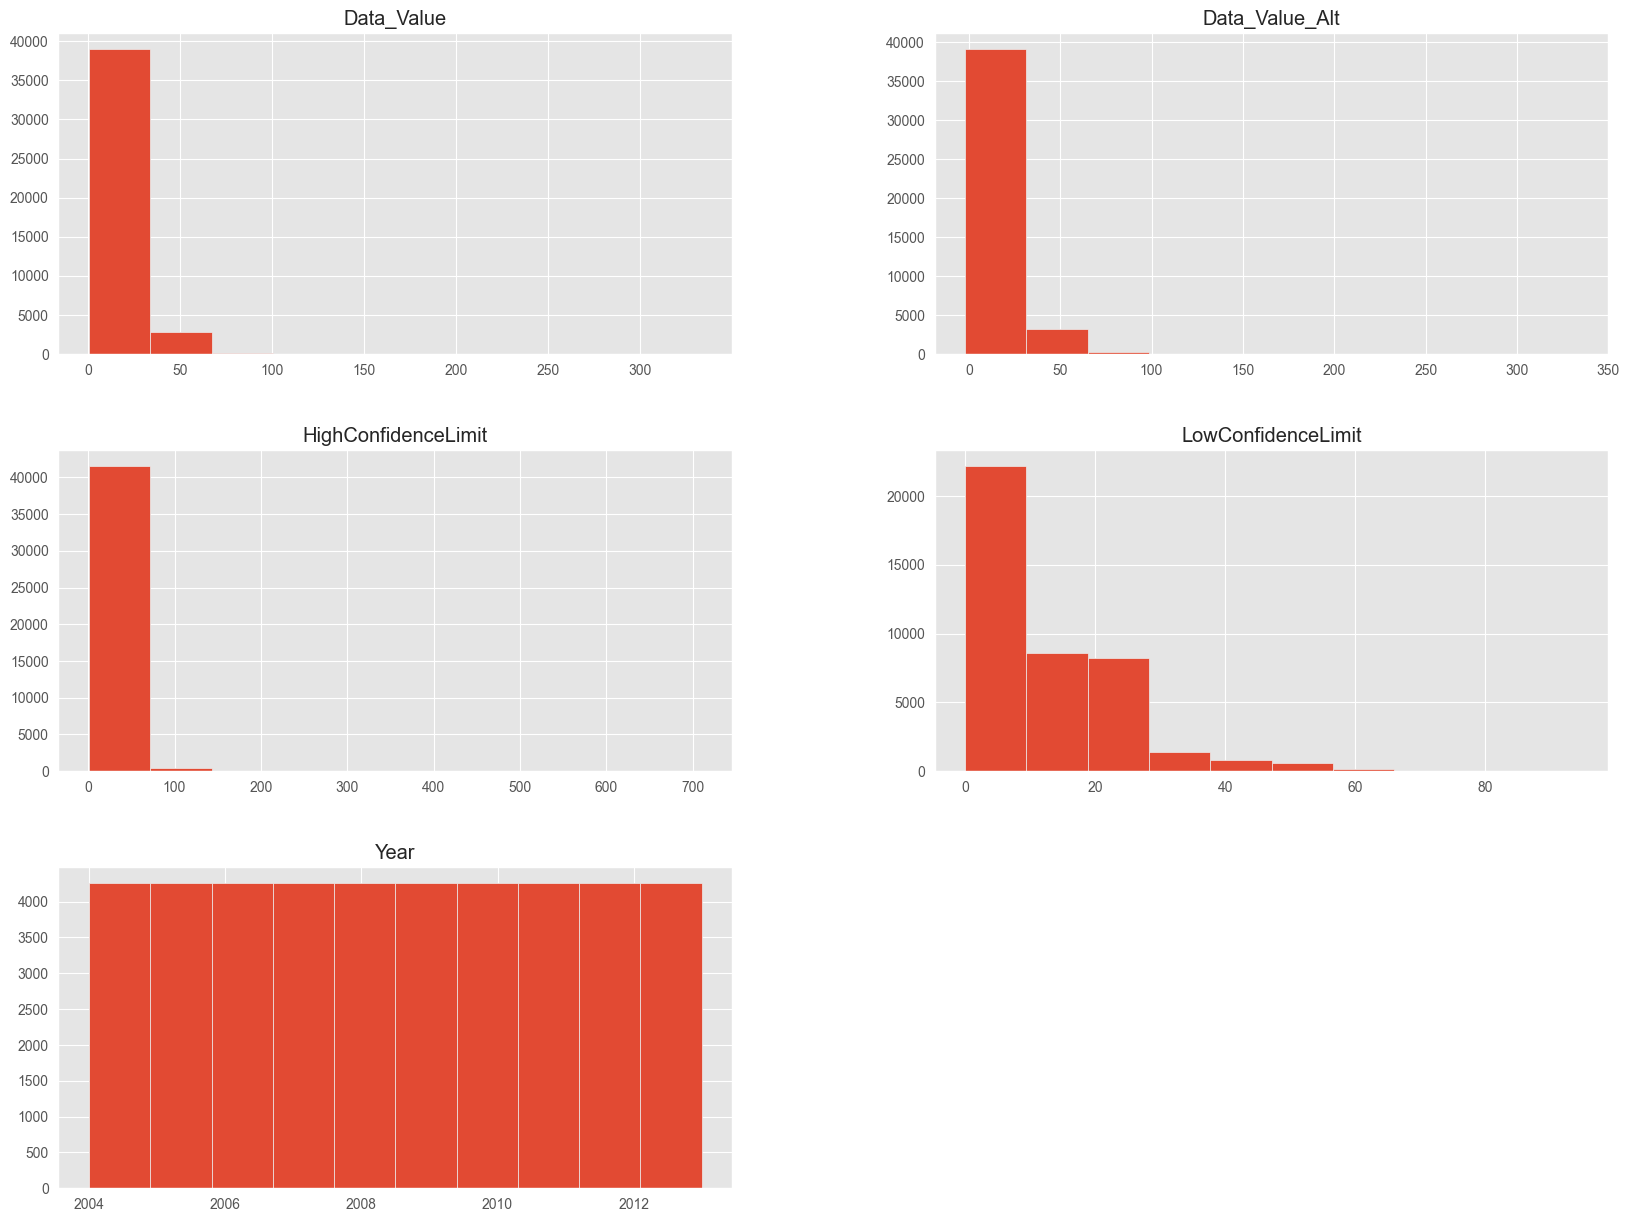

In [10]:
df.hist(figsize = (20, 15))
plt.show()

##### **Bar plots for categorical attributes**

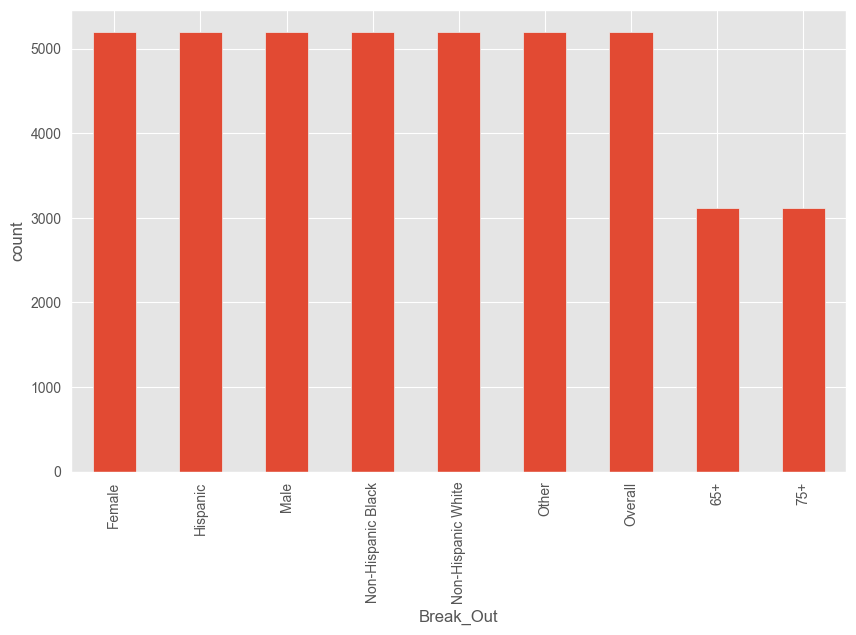

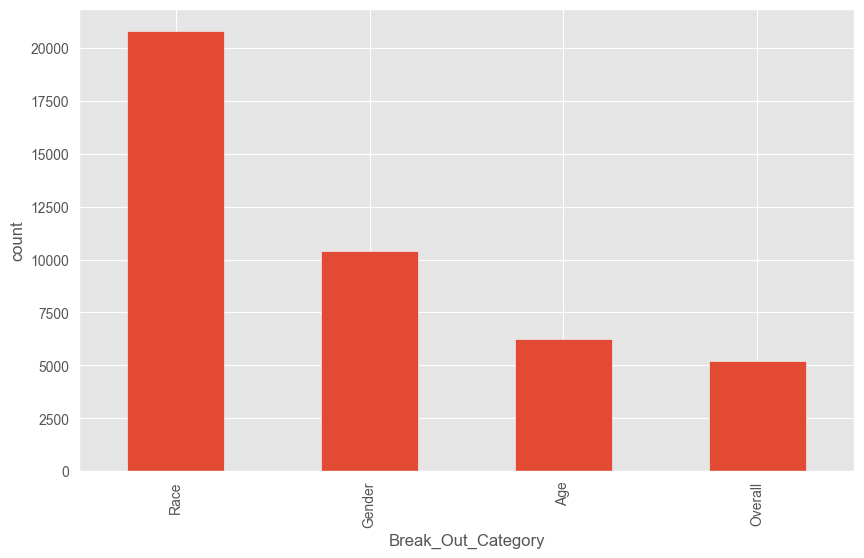

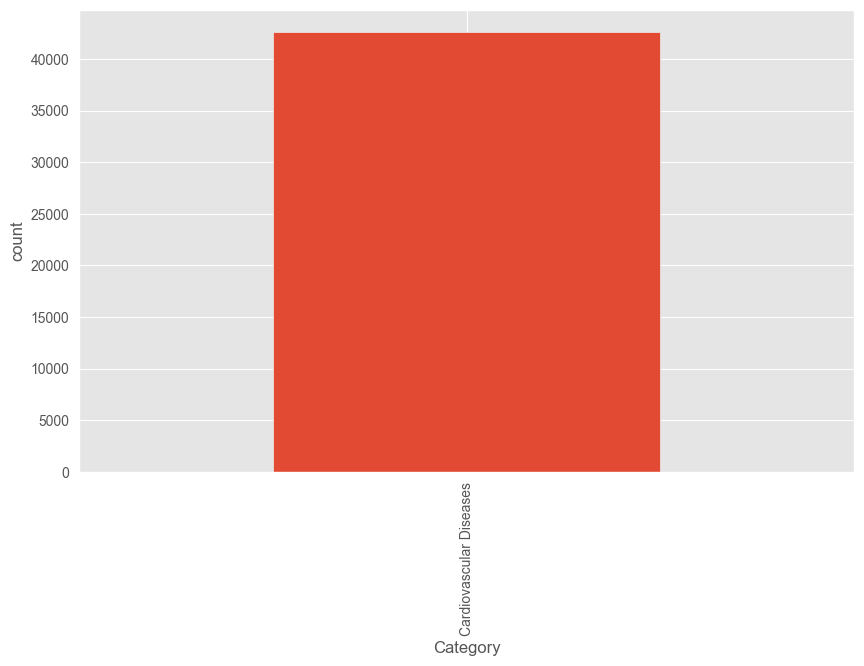

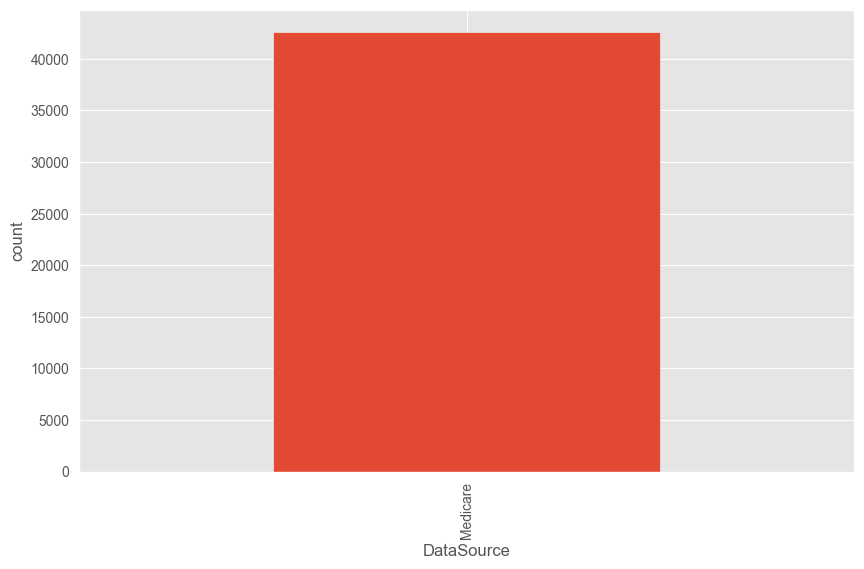

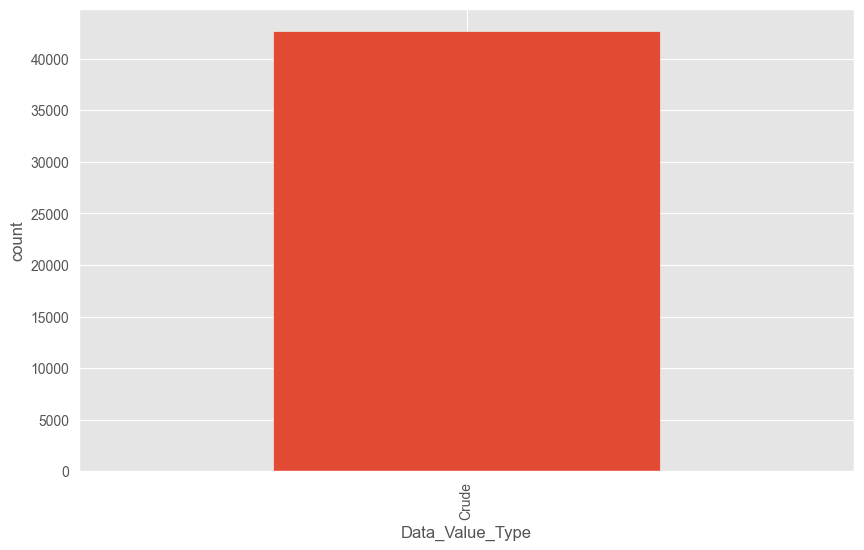

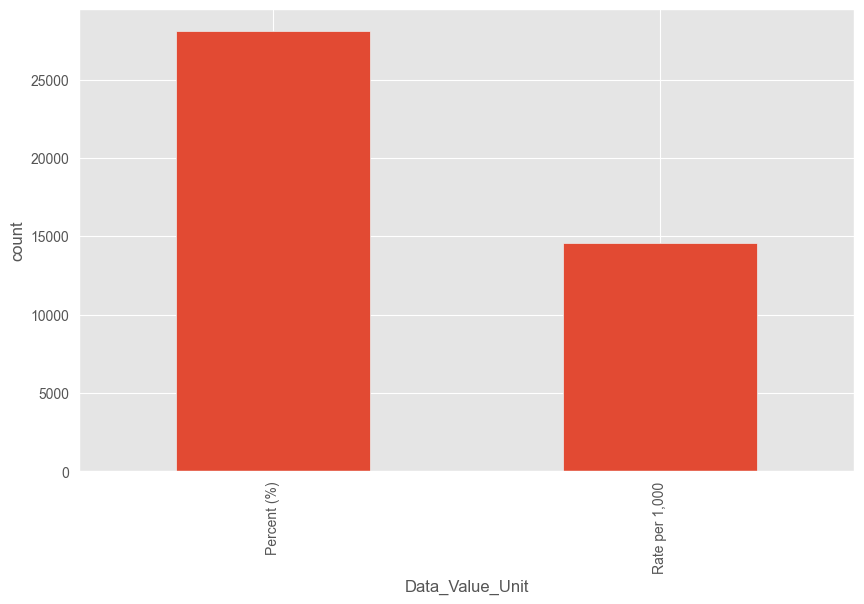

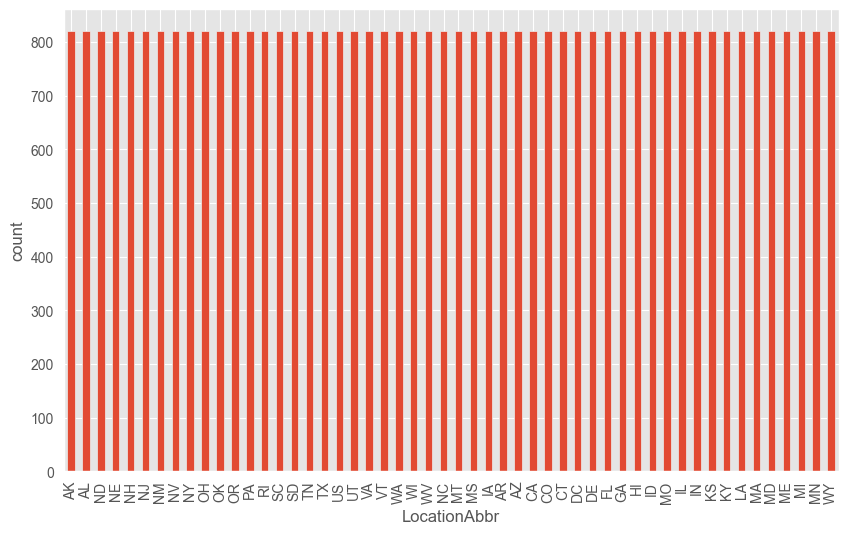

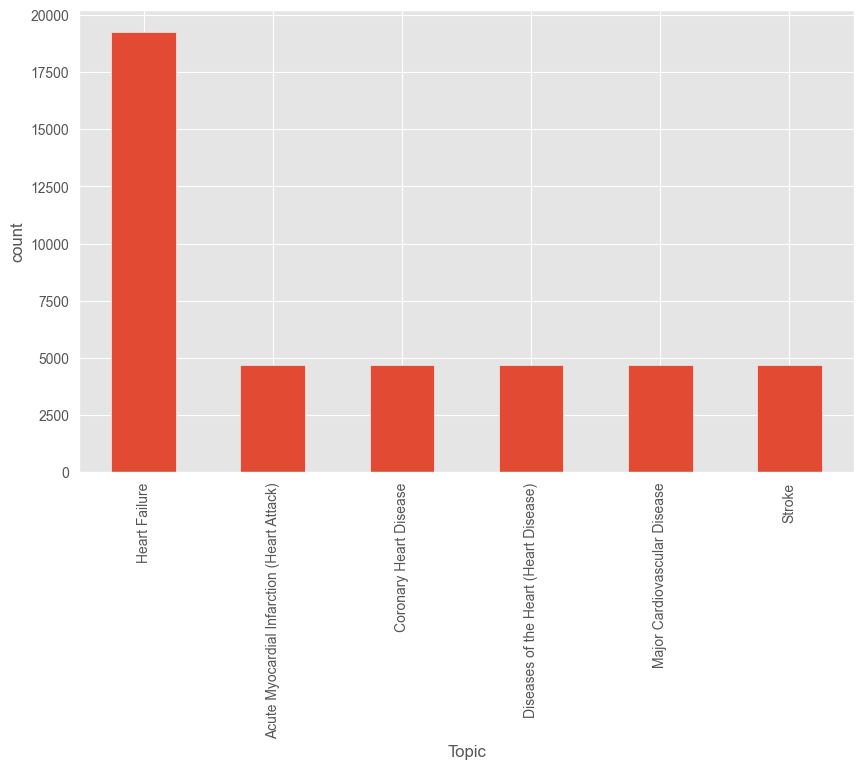

In [11]:
# categoricalAttributes = ['Break_Out', 'Break_Out_Category', 'Category', 'DataSource', 'Data_Value_Type', 'Data_Value_Unit', 'LocationAbbr', 'Topic']
for attribute in df.select_dtypes(include=["category"]):
    val = df[attribute].value_counts()
    val.plot(kind = 'bar', figsize = (10, 6))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

#### **Histograms and bar plots according to the class attributes**

In [12]:
import seaborn as sb

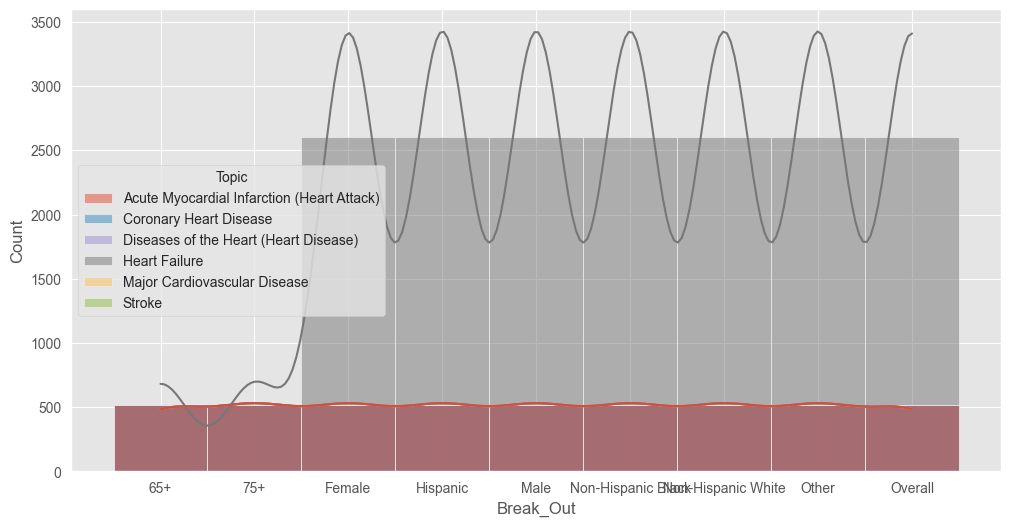

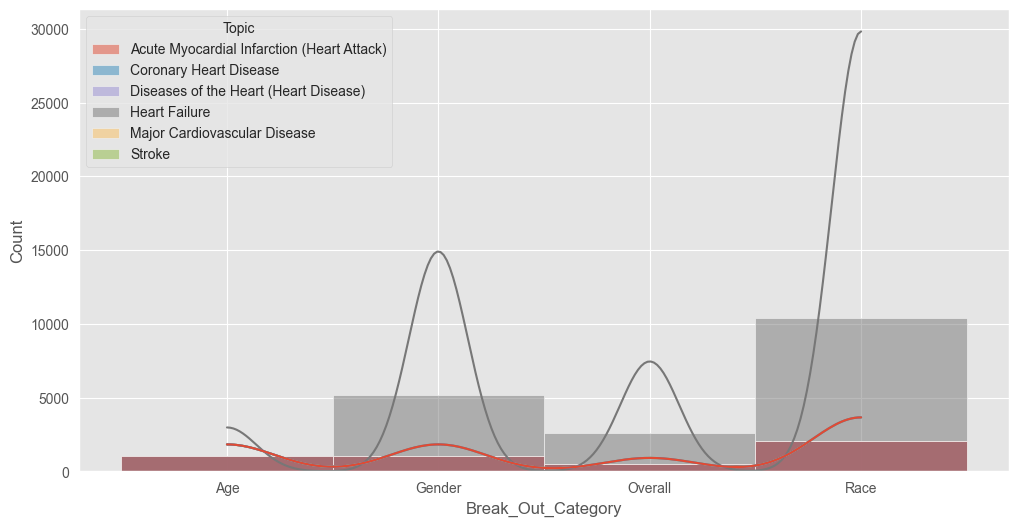

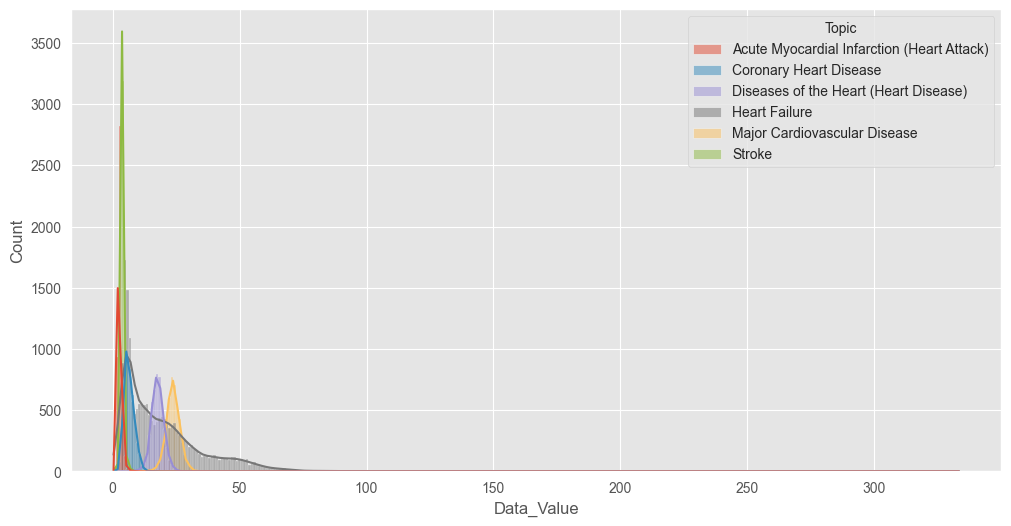

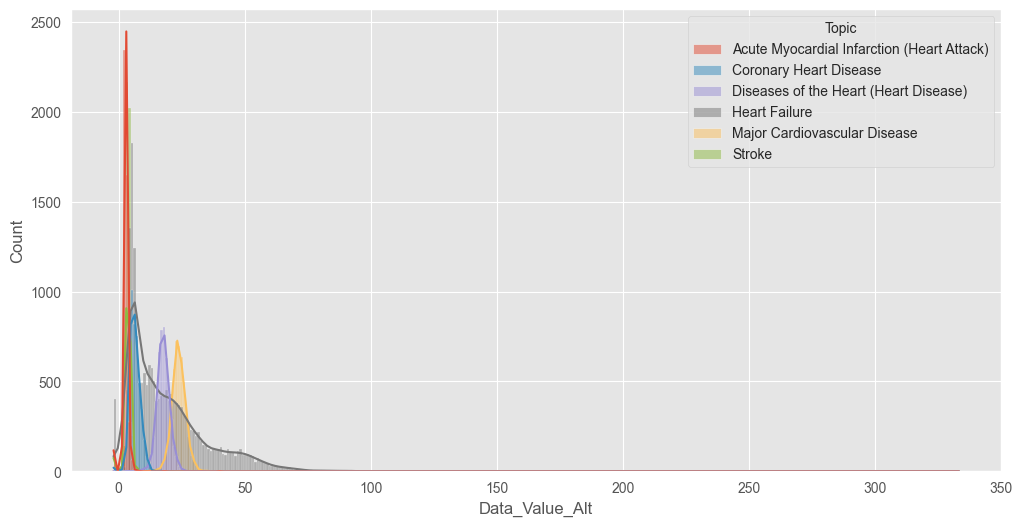

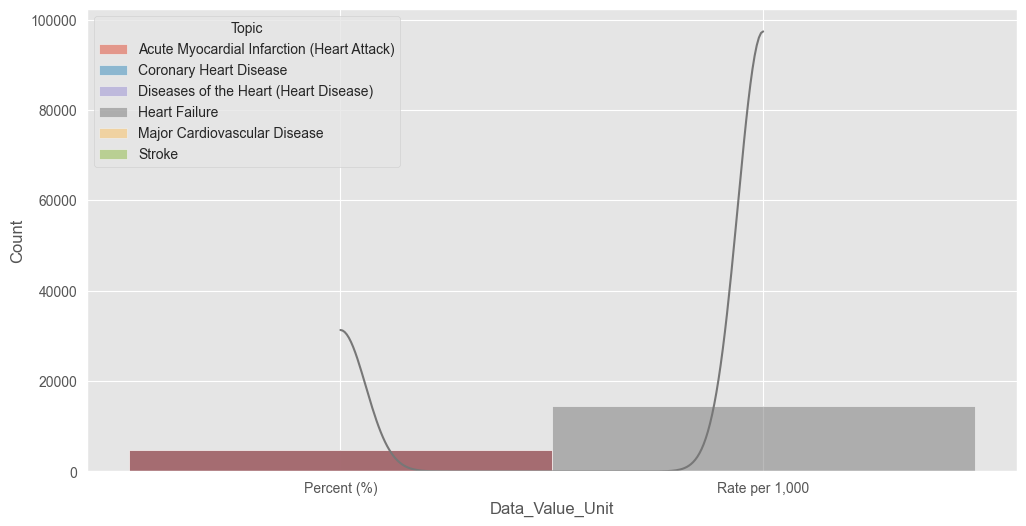

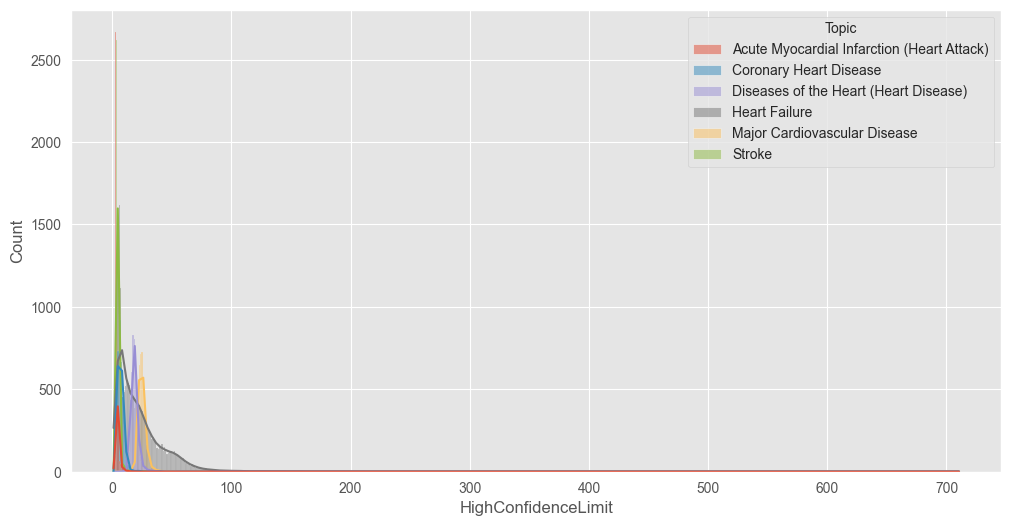

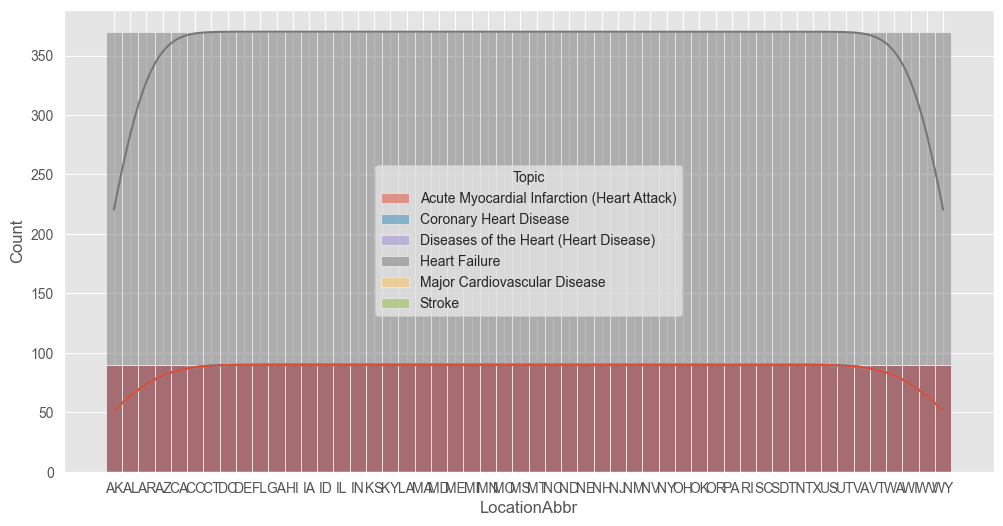

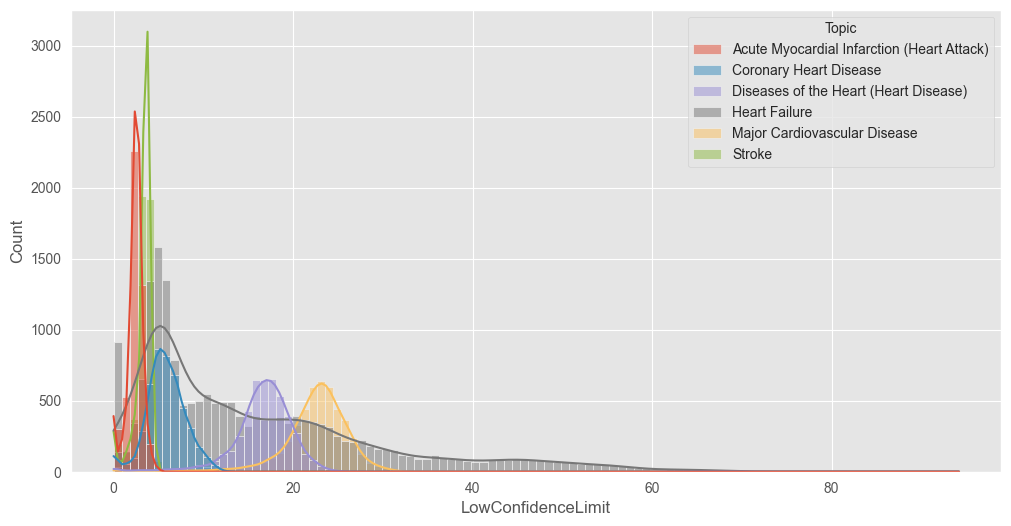

In [13]:
attributes =  df.columns.difference(['Year', 'Category', 'Data_Value_Type', 'DataSource', 'Topic'])

for attribute in attributes:
    plt.figure(figsize=(12,6))
    sb.histplot(x = df[attribute], hue = 'Topic', data = df, kde=True)
    plt.show()

# TODO: se non avessimo tolto 'Category', 'Data_Value_Type', 'DataSource' 
# (attributi con un solo valore), ci avrebbe dato un errore (matrice singolare, quindi non invertibile)

# Va bene fare così

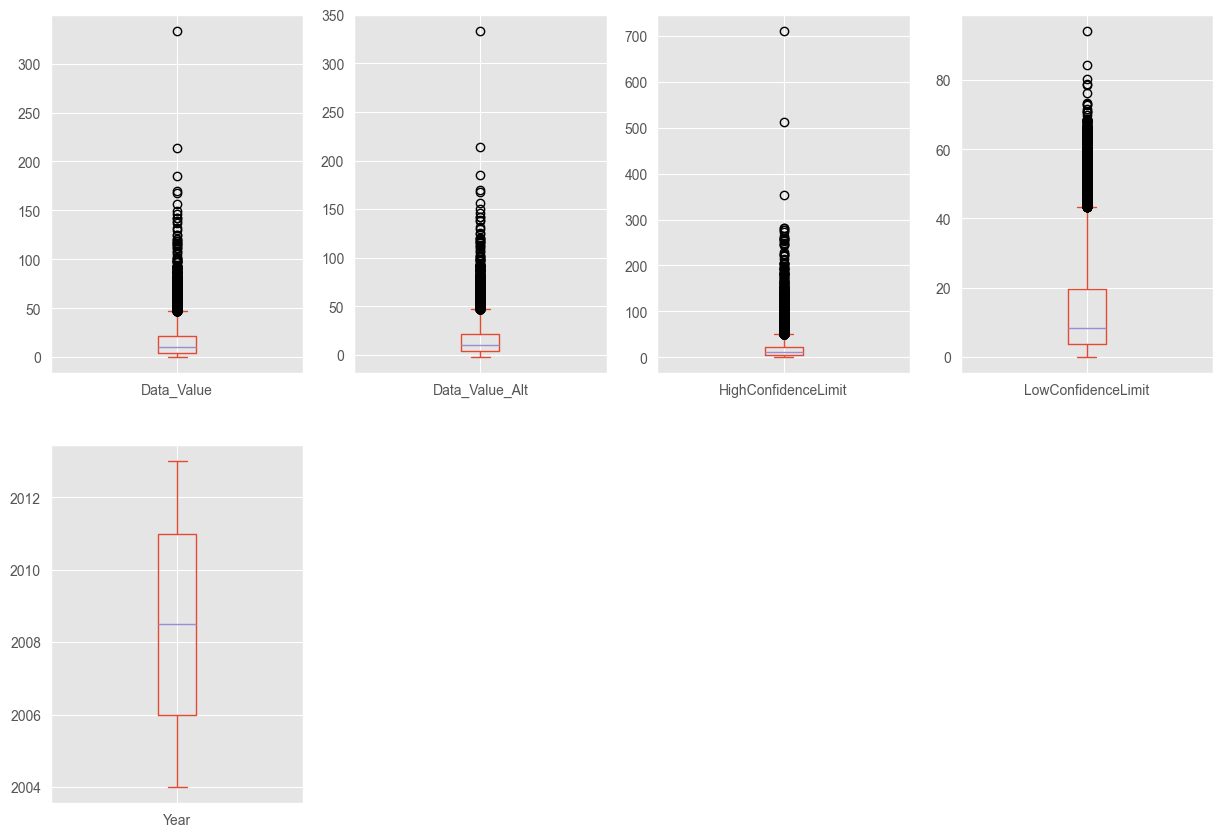

In [14]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(5, 4))
plt.show()

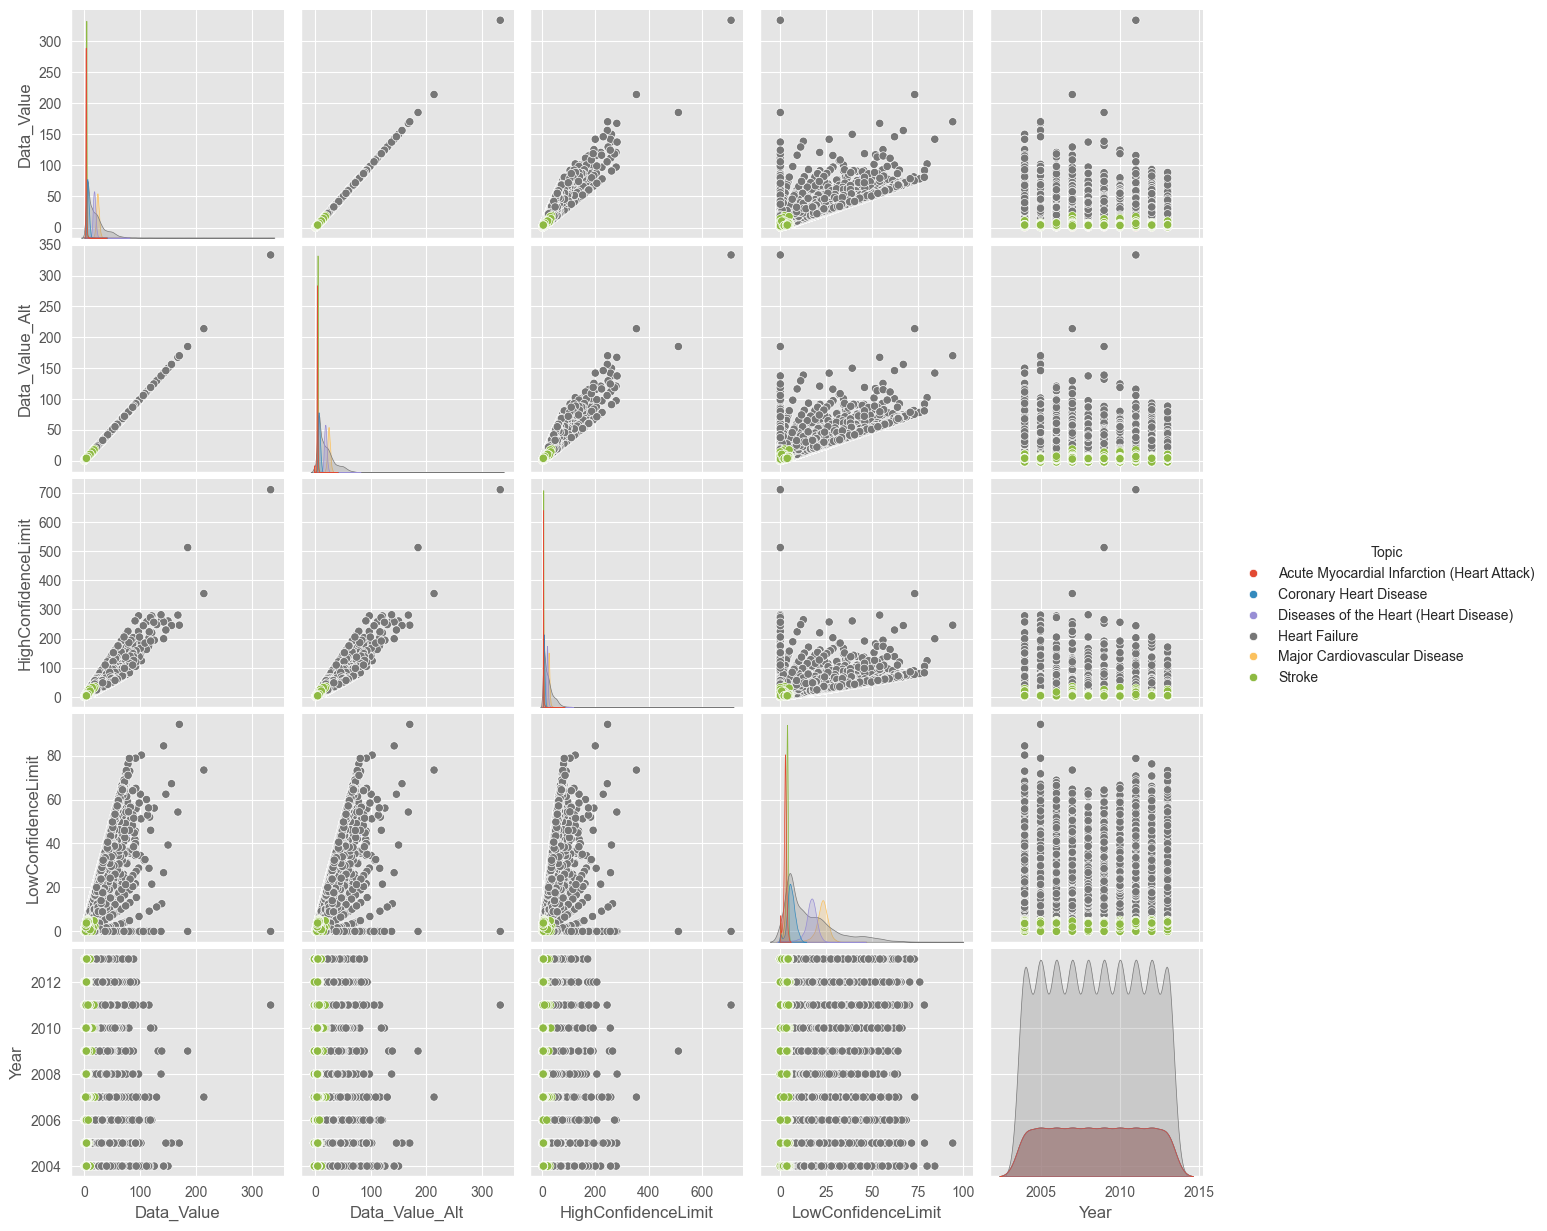

In [15]:
sb.pairplot(df, hue = 'Topic')
plt.show()

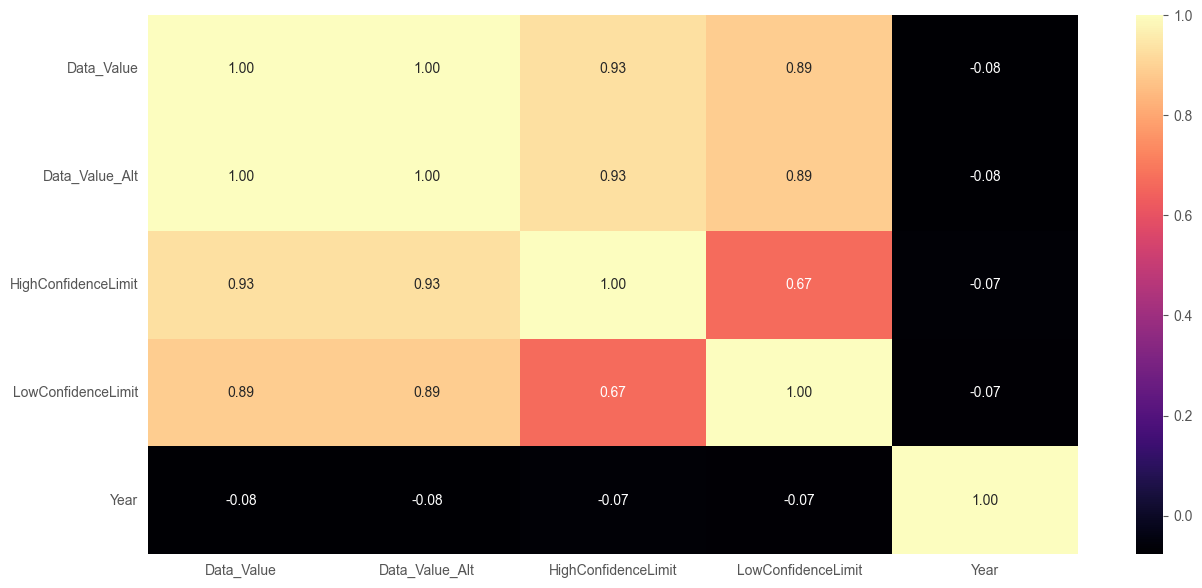

In [16]:
plt.figure(figsize=(15, 7))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f')
plt.show()

### **Data Preparation**

**Remove Year attribute because it has a constant distribution (trivial, low variability)**
**TODO: gli attributi Year e LocationAbbr vanno tolti?**

#### **Year può essere tolto (e lo togliamo!) e LocalAbbr può essere tenuto.** 
#### **Possiamo provare a fare un altro modello in cui togliamo anche LocalAbbr per vedere se le performance migliorano o peggiorano**

In [17]:
df = df[df.columns.difference(['Year'])]

**Remove Category, DataSource and Data_Value_Type because they have only one value (trivial, low variability)**

In [18]:
df = df[df.columns.difference(['Category', 'DataSource', 'Data_Value_Type'])]

#### **Remove Data_Value because its distribution is equivalent to that of Data_Value_Alt (correlation between attributes)**

In [19]:
df = df[df.columns.difference(['Data_Value'])]

In [20]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42111 entries, 0 to 42639
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            42111 non-null  category
 1   Break_Out_Category   42111 non-null  category
 2   Data_Value_Alt       42111 non-null  float64 
 3   Data_Value_Unit      42111 non-null  category
 4   HighConfidenceLimit  42111 non-null  float64 
 5   LocationAbbr         42111 non-null  category
 6   LowConfidenceLimit   42111 non-null  float64 
 7   Topic                42111 non-null  category
dtypes: category(5), float64(3)
memory usage: 1.5 MB


#### **Discretize attributes**

*We have decided not to discretize the float attributes, because they have different distributions*

#### **Binarization of categorical attributes**

In [21]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Topic')
cat_attributes.remove('LocationAbbr')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('Topic')
new_attr_list.remove('LocationAbbr')
df2 = df2[new_attr_list]
df2.head()

# TODO: capire se bisogna binarizzare o meno LocationAbbr

# No, lo teniamo

,Data_Value_Alt,HighConfidenceLimit,LowConfidenceLimit,Break_Out_65+,Break_Out_75+,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Black,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Break_Out_Category_Age,Break_Out_Category_Gender,Break_Out_Category_Overall,Break_Out_Category_Race,Data_Value_Unit_Percent (%),"Data_Value_Unit_Rate per 1,000"
0,5.2,5.3,5.1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
1,5.1,5.2,5.1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,8.5,8.5,8.4,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,5.1,5.1,5.1,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,6.1,6.1,6.1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42111 entries, 0 to 42639
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data_Value_Alt                  42111 non-null  float64
 1   HighConfidenceLimit             42111 non-null  float64
 2   LowConfidenceLimit              42111 non-null  float64
 3   Break_Out_65+                   42111 non-null  bool   
 4   Break_Out_75+                   42111 non-null  bool   
 5   Break_Out_Female                42111 non-null  bool   
 6   Break_Out_Hispanic              42111 non-null  bool   
 7   Break_Out_Male                  42111 non-null  bool   
 8   Break_Out_Non-Hispanic Black    42111 non-null  bool   
 9   Break_Out_Non-Hispanic White    42111 non-null  bool   
 10  Break_Out_Other                 42111 non-null  bool   
 11  Break_Out_Overall               42111 non-null  bool   
 12  Break_Out_Category_Age          42111

### **Modeling**

#### Split dataset

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(df2.values)
y = np.array(df['Topic'].values)

seed = 12062024
test_size = .2
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

#### Create the models

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

In [53]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))


# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))
    # print(f'Accuracy: {accuracy_score(y_val, y_val_pred):.2f}')

C45
Classification metrics: 
                                            precision    recall  f1-score   support

Acute Myocardial Infarction (Heart Attack)       0.76      0.77      0.76       766
                    Coronary Heart Disease       0.59      0.61      0.60       707
     Diseases of the Heart (Heart Disease)       0.89      0.90      0.90       751
                             Heart Failure       0.89      0.89      0.89      3016
              Major Cardiovascular Disease       0.91      0.90      0.91       767
                                    Stroke       0.63      0.61      0.62       731

                                  accuracy                           0.82      6738
                                 macro avg       0.78      0.78      0.78      6738
                              weighted avg       0.82      0.82      0.82      6738

CART
Classification metrics: 
                                            precision    recall  f1-score   support

Acute Myocard

#### For the meta-models we chose KNN and RandomForest

In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
print(f'[TRAIN] Accuracy: {knn.score(x_train, y_train)}')

y_val_pred = knn.predict(x_val)

print('Classification metrics: KNN')
print(classification_report(y_val, y_val_pred, zero_division=np.nan))

[TRAIN] Accuracy: 0.8807050092764378
Classification metrics: KNN
                                            precision    recall  f1-score   support

Acute Myocardial Infarction (Heart Attack)       0.79      0.80      0.80       766
                    Coronary Heart Disease       0.65      0.64      0.64       707
     Diseases of the Heart (Heart Disease)       0.92      0.91      0.92       751
                             Heart Failure       0.89      0.91      0.90      3016
              Major Cardiovascular Disease       0.93      0.90      0.92       767
                                    Stroke       0.66      0.65      0.65       731

                                  accuracy                           0.84      6738
                                 macro avg       0.81      0.80      0.80      6738
                              weighted avg       0.84      0.84      0.84      6738


In [43]:
rf = RandomForestClassifier(n_estimators=50, random_state=seed)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=12062024)

In [56]:
print(f'[TRAIN] Accuracy: {rf.score(x_train, y_train)}')

y_val_pred = rf.predict(x_val)

print('Classification metrics: RandomForest')
print(classification_report(y_val, y_val_pred, zero_division=np.nan))

[TRAIN] Accuracy: 0.9392578849721707
Classification metrics: RandomForest
                                            precision    recall  f1-score   support

Acute Myocardial Infarction (Heart Attack)       0.79      0.76      0.77       766
                    Coronary Heart Disease       0.64      0.59      0.61       707
     Diseases of the Heart (Heart Disease)       0.91      0.92      0.92       751
                             Heart Failure       0.90      0.90      0.90      3016
              Major Cardiovascular Disease       0.94      0.92      0.93       767
                                    Stroke       0.61      0.65      0.63       731

                                  accuracy                           0.83      6738
                                 macro avg       0.80      0.79      0.79      6738
                              weighted avg       0.83      0.83      0.83      6738


### **Evaluation**

#### **Due to the metrics in the report (f1-score, precision and recall) we choose as best model the Neural Network**

#### Predictions on test set

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:

model = MLPClassifier(hidden_layer_sizes=(50, 10, ),max_iter=500, verbose=True, random_state=seed)

model.fit(x_train, y_train)
predictions = model.predict(x_test)

Iteration 1, loss = 2.04306571
Iteration 2, loss = 1.18811627
Iteration 3, loss = 0.85698453
Iteration 4, loss = 0.61202415
Iteration 5, loss = 0.52199074
Iteration 6, loss = 0.47822960
Iteration 7, loss = 0.45320659
Iteration 8, loss = 0.43711994
Iteration 9, loss = 0.42579009
Iteration 10, loss = 0.41807608
Iteration 11, loss = 0.41223128
Iteration 12, loss = 0.40455892
Iteration 13, loss = 0.39797605
Iteration 14, loss = 0.39568827
Iteration 15, loss = 0.38657258
Iteration 16, loss = 0.38328319
Iteration 17, loss = 0.38127805
Iteration 18, loss = 0.37776958
Iteration 19, loss = 0.37629090
Iteration 20, loss = 0.37407887
Iteration 21, loss = 0.37206353
Iteration 22, loss = 0.37060101
Iteration 23, loss = 0.36987659
Iteration 24, loss = 0.36786879
Iteration 25, loss = 0.36744059
Iteration 26, loss = 0.36658057
Iteration 27, loss = 0.36791885
Iteration 28, loss = 0.36492344
Iteration 29, loss = 0.36580252
Iteration 30, loss = 0.36319665
Iteration 31, loss = 0.36412308
Iteration 32, los

In [28]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.85


In [29]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

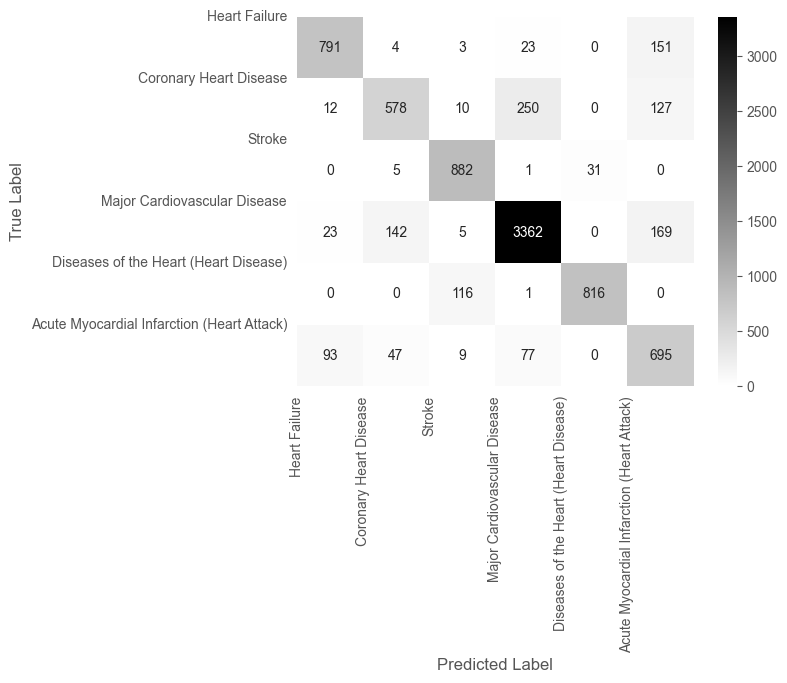

In [54]:
categories = df['Topic'].unique()

plt.figure()

make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.yticks(ticks=range(len(categories)), labels=categories)
plt.show()

##### **Compute the Roc Curve for the best model**

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['Topic']))

model.fit(x_train, y_train)
prob = model.predict_proba(x_test)

Iteration 1, loss = 2.04306571
Iteration 2, loss = 1.18811627
Iteration 3, loss = 0.85698453
Iteration 4, loss = 0.61202415
Iteration 5, loss = 0.52199074
Iteration 6, loss = 0.47822960
Iteration 7, loss = 0.45320659
Iteration 8, loss = 0.43711994
Iteration 9, loss = 0.42579009
Iteration 10, loss = 0.41807608
Iteration 11, loss = 0.41223128
Iteration 12, loss = 0.40455892
Iteration 13, loss = 0.39797605
Iteration 14, loss = 0.39568827
Iteration 15, loss = 0.38657258
Iteration 16, loss = 0.38328319
Iteration 17, loss = 0.38127805
Iteration 18, loss = 0.37776958
Iteration 19, loss = 0.37629090
Iteration 20, loss = 0.37407887
Iteration 21, loss = 0.37206353
Iteration 22, loss = 0.37060101
Iteration 23, loss = 0.36987659
Iteration 24, loss = 0.36786879
Iteration 25, loss = 0.36744059
Iteration 26, loss = 0.36658057
Iteration 27, loss = 0.36791885
Iteration 28, loss = 0.36492344
Iteration 29, loss = 0.36580252
Iteration 30, loss = 0.36319665
Iteration 31, loss = 0.36412308
Iteration 32, los

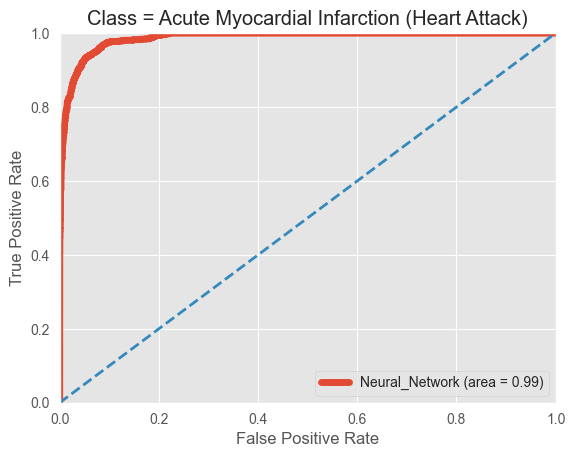

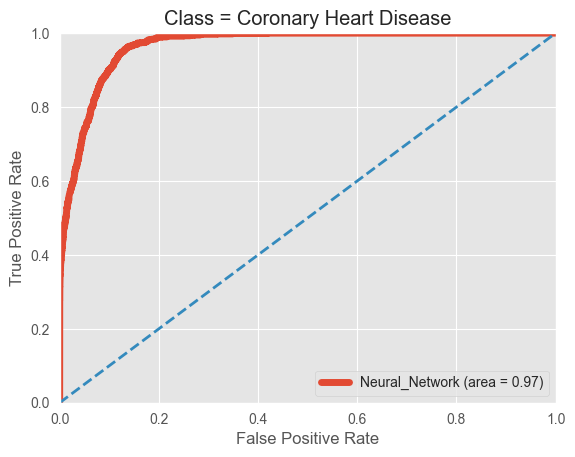

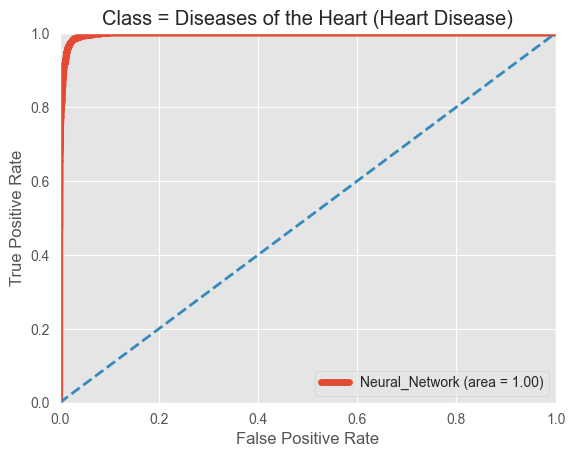

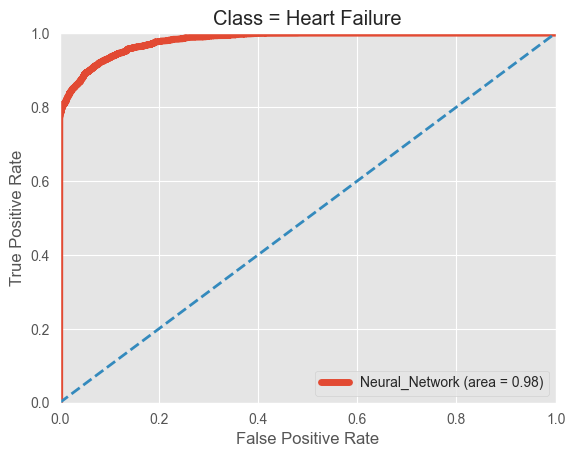

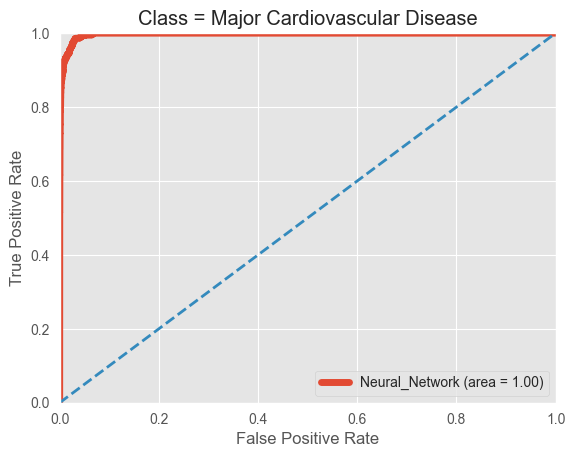

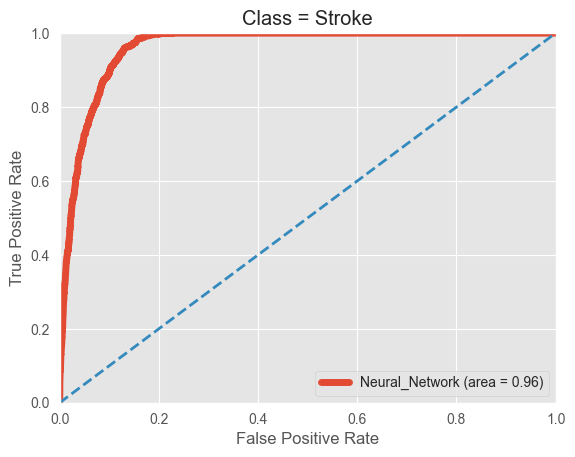

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], prob[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label=f'Neural_Network (area = {roc_auc[i]:.2f})')
    m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

#### **Per la relazione: scrivere nel dettaglio (soprattuto per Data Understanding e Preparation) le scelte fatte e le relative motivazioni.**

#### **non ci sono limiti sulla lunghezza, ma no report di 40+ pagine per l'amor di superMalvi (non seguire metodologia crisp perché è degli anni precedenti)**